In [1]:
from matplotlib import pyplot as plt
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math

In [2]:
evt_x = np.loadtxt("data/fit-data-4.txt")

In [3]:
evt_x.max()

199.668612137749

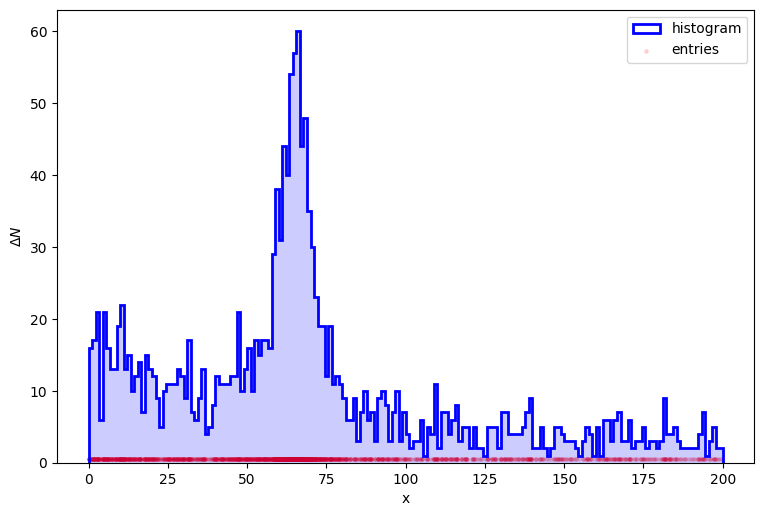

In [4]:
fig, ax = plt.subplots(figsize=(9,6),dpi=100)
n_bins = 180
x_range = (0, 200)
data_y, bins, patches = ax.hist(evt_x, n_bins, range=x_range, density=False, 
    histtype=u'step', edgecolor='b', linewidth=2, label='histogram')
ax.hist(evt_x, n_bins, range=x_range, density=False, color='b', alpha=0.2)
ax.scatter(evt_x, np.full_like(evt_x, 0.5), marker='o', color='r', s=10, alpha=0.2, linewidth=0, label='entries')
plt.xlabel('x')
plt.ylabel('$\Delta N$')
plt.legend()
plt.show()

In [5]:
#bins

In [6]:
data_x = (bins+(bins[1]-bins[0])/2)[:-1]
#print(data_x)
#print

In [7]:
data_yerr = np.sqrt(data_y)
#print(data_y)
#print(data_yerr)

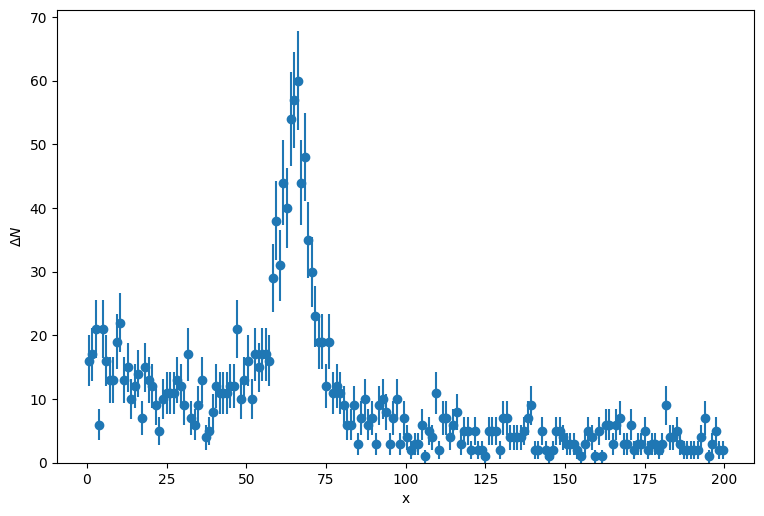

In [8]:
plt.figure(figsize=(9,6),dpi=100)
plt.errorbar(data_x, data_y, data_yerr, fmt="o")
plt.xlabel('x')
plt.ylabel('$\Delta N$')
plt.ylim(0)
plt.show()

In [13]:
def bkg_pdf(x, par):
    return np.exp(-x/par[0])/par[0]+par[1]/200
def bkg_pdf2(x, par):
    return 1/200
def sig_pdf(x, par):
    return np.exp(-((x-par[0])/par[1])**2/2)/math.sqrt(2*math.pi*par[1]**2)
def bkg_model(x, par):
    return par[0]*bkg_pdf(x, par[1:])
def sig_model(x, par):
    return par[0]*sig_pdf(x, par[1:])
def sig_model2(x, par):
    return par[0]*sig_pdf(x, par[1::2])
def fit_model(x, par):
    return bkg_model(x, par)+sig_model(x, par[3:])+sig_model2(x, par[3:])

In [15]:
least_squares_mode = LeastSquares(data_x[data_y>0], data_y[data_y>0], data_yerr[data_y>0], fit_model)
m = Minuit(least_squares_mode, (250,40,50,60,65,0.5,2.5), name=("B", "C", "$\lambda$", "S", "$\mu$", "$\sigma_1$","$\sigma_2$"))

In [16]:
m.migrad()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 191.9                      │              Nfcn = 986              │
│ EDM = 4.39e-05 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name       │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ B          │  0.56e3   │  0.10e3   │            │            │         │         │       │
│ 1 │ C          │    43     │     9     │            │            │         │         │       │
│ 2 │ $\lambda$  │   0.87    │   0.28    │            │            │         │         │       │
│ 3 │ S          │    358    │    24     │            │            │         │         │       │
│ 4 │ $\mu$      │   65.05   │   0.30    │            │            │         │         │       │
│ 5 │ $\sigma_1$ │   -11.5   │    1.5    │            │            │         │         │       │
│ 6 │ $\sigma_2$ │   3.90    │   0.32    │            │            │         │         │       │
└───┴────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────────┬──────────────────────────────────────────────────────────────────────────────┐
│            │          B          C  $\lambda$          S      $\mu$ $\sigma_1$ $\sigma_2$ │
├────────────┼──────────────────────────────────────────────────────────────────────────────┤
│          B │   1.06e+04        876      -27.6   -1.6e+03       2.11       99.9      -8.07 │
│          C │        876       85.5      -2.34       -140      0.126       8.61     -0.703 │
│  $\lambda$ │      -27.6      -2.34     0.0759       3.87   -0.00536     -0.238     0.0196 │
│          S │   -1.6e+03       -140       3.87        575     -0.434      -24.2       1.85 │
│      $\mu$ │       2.11      0.126   -0.00536     -0.434      0.092     0.0253    -0.0101 │
│ $\sigma_1$ │       99.9       8.61     -0.238      -24.2     0.0253        2.3    -0.0917 │
│ $\sigma_2$ │      -8.07     -0.703     0.0196       1.85    -0.0101    -0.0917      0.101 │
└────────────┴──────────────────────────────────────────────────────────────────────────────┘

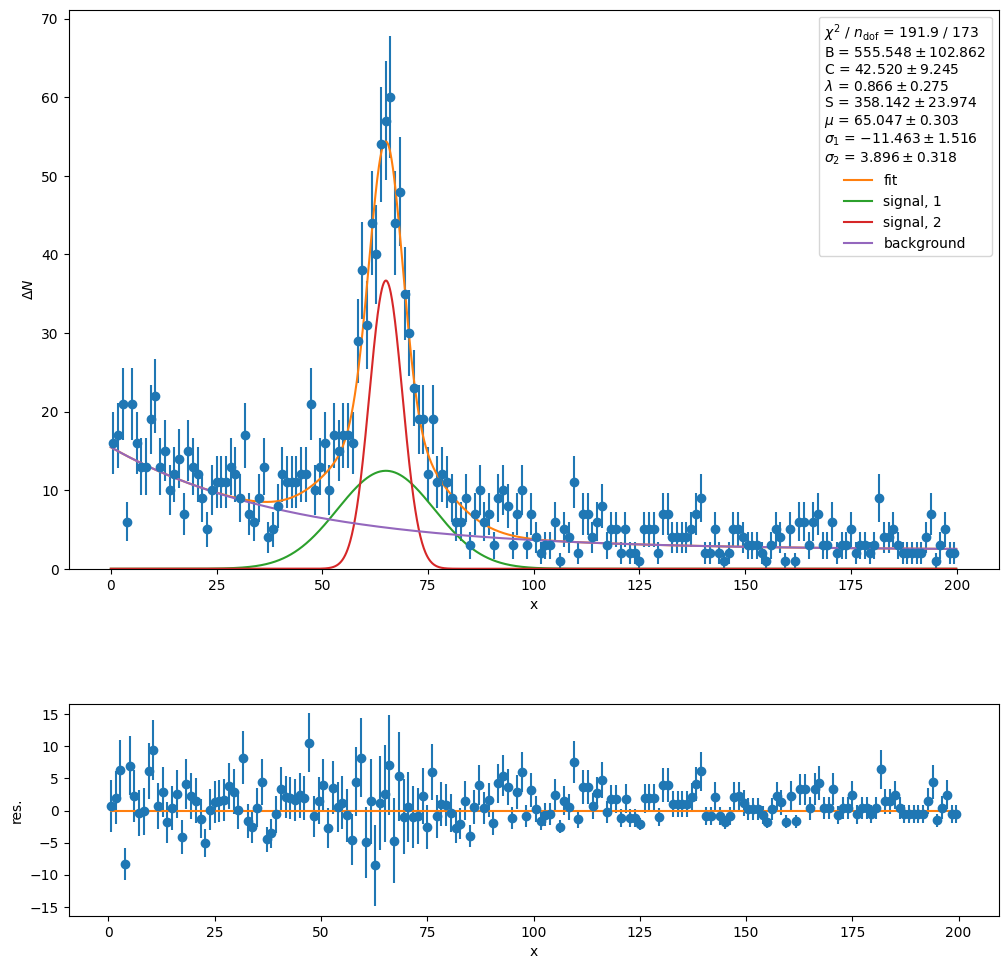

In [18]:
import matplotlib.gridspec as gridspec
data_x_f = np.arange(0, bins[-1], 0.1)
data_y_f = fit_model(data_x_f, m.values)
bkg_y_f = bkg_model(data_x_f, m.values)
sig_y_f = sig_model(data_x_f, m.values[3:])
sig_y_f2 = sig_model2(data_x_f, (m.values[3:]))

plt.figure(figsize=(12,12),dpi=100)
gs = gridspec.GridSpec(8, 1)
ax0 = plt.subplot(gs[:5, :])
ax1 = plt.subplot(gs[6:, :])
ax0.errorbar(data_x, data_y, data_yerr, fmt="o")
ax0.plot(data_x_f, data_y_f, label="fit")
ax0.plot(data_x_f, sig_y_f, label="signal, 1")
ax0.plot(data_x_f, sig_y_f2, label="signal, 2")
ax0.plot(data_x_f, bkg_y_f, label="background")
ax0.set_xlabel('x')
ax0.set_ylabel('$\Delta N$')
ax1.errorbar(data_x, data_y-fit_model(data_x, m.values), data_yerr, fmt="o")
ax1.plot([data_x[0],data_x[-1]], [0,0])
ax1.set_xlabel('x')
ax1.set_ylabel('res.')
ax0.set_ylim(0)
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_x) - m.nfit}" ]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
ax0.legend(title="\n".join(fit_info))
plt.show()
plt.show()
plt.show()